# 3. Nonlinear, multimodal image registration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import itk

## Load data

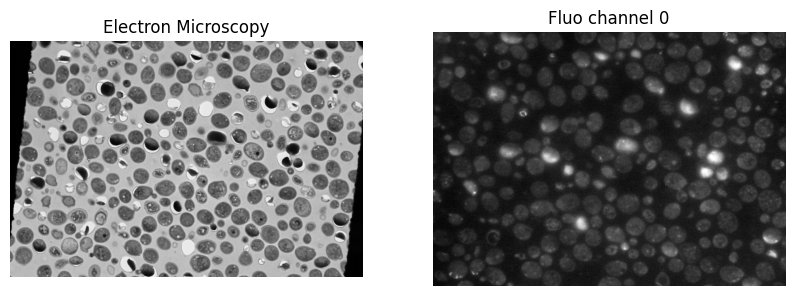

In [72]:
fixed = io.imread("../example_data/em.tif")
moving = io.imread("../example_data/fluo_ch0.tif")

fixed_image_itk = itk.GetImageFromArray(fixed)
moving_image_itk = itk.GetImageFromArray(moving)

# show the images next to each other
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(fixed_image_itk, cmap='gray')
ax[0].set_title('Electron Microscopy')
ax[0].axis('off')
ax[1].imshow(moving_image_itk, cmap='gray')
ax[1].set_title('Fluo channel 0')
ax[1].axis('off')

plt.show()

### Artificially warp fixed image

In [47]:
fixed_warped.dtype

dtype('float64')

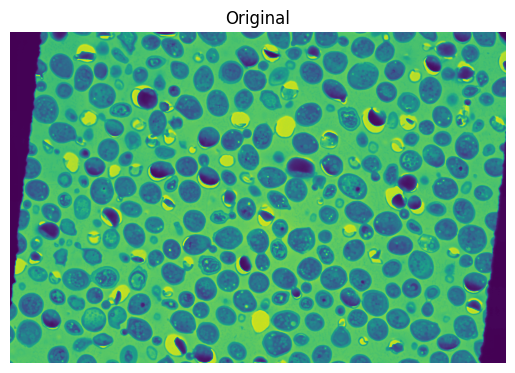

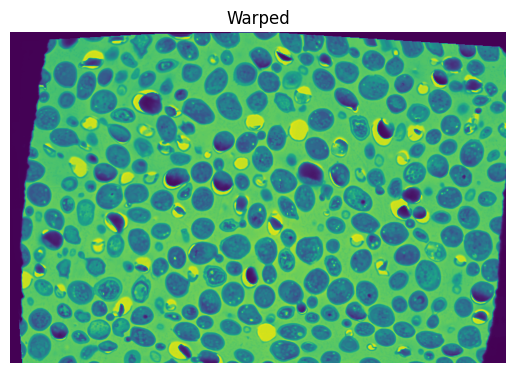

In [73]:
from skimage import transform

pt = transform.PiecewiseAffineTransform()
src = np.array(np.meshgrid(np.linspace(0, fixed.shape[1], 5), np.linspace(0, fixed.shape[0], 6))).reshape((2, -1))
np.random.seed(42)
dst = src + np.array([np.random.random(src[0].shape) * 30 for i in range(2)])
pt.estimate(src.T, dst.T)
fixed_warped = transform.warp(fixed, pt.inverse)

plt.figure()
plt.imshow(fixed)
plt.title('Original')
plt.axis(False)
plt.figure()
plt.imshow(fixed_warped)
plt.title('Warped')
plt.axis(False)

fixed_image_itk = itk.GetImageFromArray((fixed_warped * 256).astype(np.uint8))

## The parameters

In [60]:
# here we load the default parameter map for bspline (nonlinear) transforms
pmap_bspline = itk.ParameterObject.New().GetDefaultParameterMap('bspline')

# print the default parameter map
pd.DataFrame(
    {'Parameters': pmap_bspline.keys(),
    'Values': pmap_bspline.values()}
    )

,Parameters,Values
0,AutomaticParameterEstimation,"(true,)"
1,CheckNumberOfSamples,"(true,)"
2,DefaultPixelValue,"(0,)"
3,FinalBSplineInterpolationOrder,"(3,)"
4,FinalGridSpacingInPhysicalUnits,"(10.000000,)"
5,FixedImagePyramid,"(FixedSmoothingImagePyramid,)"
6,GridSpacingSchedule,"(2.803221, 1.988100, 1.410000, 1.000000)"
7,ImageSampler,"(RandomCoordinate,)"
8,Interpolator,"(LinearInterpolator,)"
9,MaximumNumberOfIterations,"(256,)"


In [74]:
registration_parameter_object = itk.ParameterObject.New()
# registration_parameter_object.AddParameterMap(pmap_bspline)

registration_parameter_object.AddParameterMap(itk.ParameterObject.New().GetDefaultParameterMap('rigid'))
# registration_parameter_object.AddParameterMap(itk.ParameterObject.New().GetDefaultParameterMap('affine'))
# registration_parameter_object.AddParameterMap(itk.ParameterObject.New().GetDefaultParameterMap('bspline'))

# fixed_image_itk.SetOrigin((-100, 0))

transformed_moving_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_itk,
    moving_image_itk,
    parameter_object=registration_parameter_object,
    log_to_console=False
    )

# needs initialization

In [ ]:
registration_parameter_object = itk.ParameterObject.New()
# registration_parameter_object.AddParameterMap(pmap_bspline)

registration_parameter_object.AddParameterMap(itk.ParameterObject.New().GetDefaultParameterMap('rigid'))
# registration_parameter_object.AddParameterMap(itk.ParameterObject.New().GetDefaultParameterMap('affine'))
# registration_parameter_object.AddParameterMap(itk.ParameterObject.New().GetDefaultParameterMap('bspline'))

fixed_image_itk.SetOrigin((-100, 0))

transformed_moving_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_itk,
    moving_image_itk,
    parameter_object=registration_parameter_object,
    log_to_console=False
    )

In [75]:
registration_parameter_object = itk.ParameterObject.New()
# registration_parameter_object.AddParameterMap(pmap_bspline)

registration_parameter_object.AddParameterMap(itk.ParameterObject.New().GetDefaultParameterMap('rigid'))
# registration_parameter_object.AddParameterMap(itk.ParameterObject.New().GetDefaultParameterMap('affine'))
pmap_bspline = itk.ParameterObject.New().GetDefaultParameterMap('bspline')
pmap_bspline['GridSpacingSchedule'] = [str(v) for v in [10] * 4]
registration_parameter_object.AddParameterMap(pmap_bspline)

fixed_image_itk.SetOrigin((-100, 0))

transformed_moving_image_nl, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_itk,
    moving_image_itk,
    parameter_object=registration_parameter_object,
    log_to_console=False
    )

In [13]:
p = result_transform_parameters.GetParameterMap(0)
pd.DataFrame(
    {'Parameters': p.keys(),
    'Values': p.values()}
    )

,Parameters,Values
0,BSplineTransformSplineOrder,"(3,)"
1,CompressResultImage,"(false,)"
2,DefaultPixelValue,"(0,)"
3,Direction,"(1, 0, 0, 1)"
4,FinalBSplineInterpolationOrder,"(3,)"
5,FixedImageDimension,"(2,)"
6,FixedInternalImagePixelType,"(float,)"
7,GridDirection,"(1, 0, 0, 1)"
8,GridIndex,"(0, 0)"
9,GridOrigin,"(-204.5, -102.5)"


In [8]:
import jupyter_compare_view

Jupyter compare_view v0.2.4



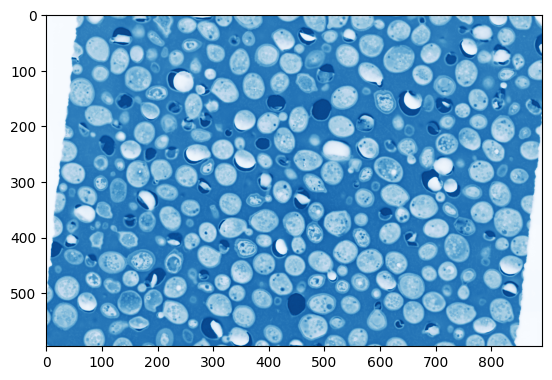
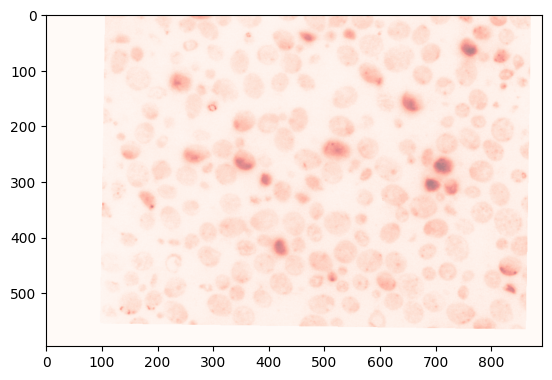

In [54]:
%%compare

# overlay images in different colors

plt.figure()
plt.imshow(fixed_image_itk, cmap='Blues')
plt.show()

plt.figure()
plt.imshow(transformed_moving_image, cmap='Reds', alpha=0.5)
plt.show()


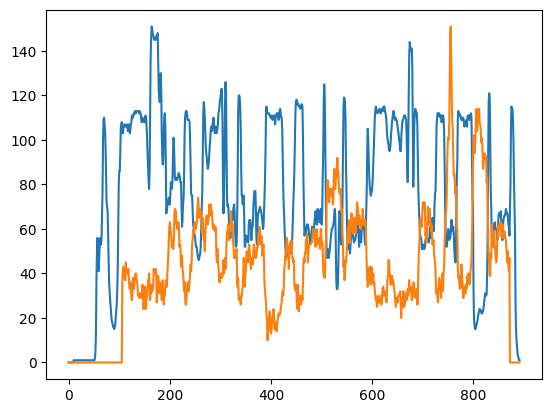

In [52]:
plt.figure()
plt.plot(fixed_image_itk[10])
plt.plot(transformed_moving_image[10])


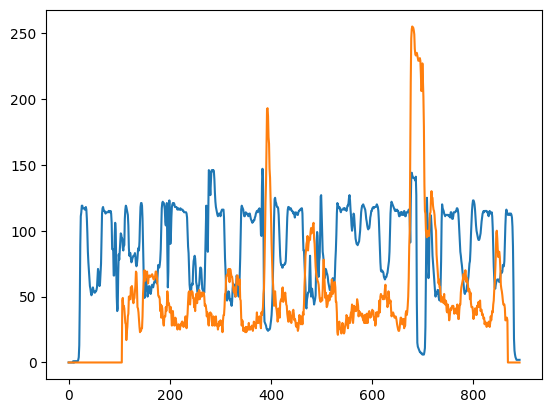

In [41]:
plt.figure()
plt.plot(fixed_image_itk[300])
plt.plot(transformed_moving_image[300])


In [11]:
df = itk.transformix_deformation_field(moving_image_itk, result_transform_parameters)

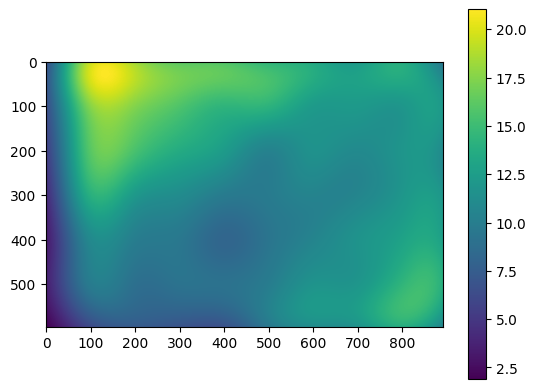

In [12]:
plt.figure()
plt.imshow(np.linalg.norm(np.array(df), axis=2))
plt.colorbar()

In [76]:
import napari

def add_itk_image_to_viewer(viewer, image_itk, layer_name, colormap):
    viewer.add_image(
        image_itk,
        translate=fixed_image_itk.GetOrigin(),
        scale=fixed_image_itk.GetSpacing(),
        name=layer_name, colormap=colormap, blending='additive')

viewer = napari.Viewer()

add_itk_image_to_viewer(viewer, fixed_image_itk, 'fixed', 'Blue') 
# add_itk_image_to_viewer(viewer, moving_image_itk, 'moving', 'Red') 
add_itk_image_to_viewer(viewer, transformed_moving_image, 'moving_transformed', 'Red') 
add_itk_image_to_viewer(viewer, transformed_moving_image_nl, 'moving_transformed_nl', 'Red') 

In [43]:
np.array(fixed_image_itk).max()

0

In [ ]:
# we could change a paremeter like in the following example
# notice that all parameter values are tuples of strings

default_translation_parameter_map['MaximumNumberOfIterations'] = ("300", )

# print the default parameter map
pd.DataFrame(
    {'Parameters': default_translation_parameter_map.keys(),
    'Values': default_translation_parameter_map.values()}
    )